# Problem Set 1 - KNN
## CSCI 5622 - Spring 2020

For today's assignment, we will be implementing our own K-Nearest Neighbors (KNN) algorithm.

*But Professor Quigley, hasn't someone else already written KNN before?*

Yes, you are not the first to implement KNN, or basically any algorithm we'll work with in this class. But 1) I'll know that you know what's really going on, and 2) you'll know you can do it, because 2a) someday you might have to implement some machine learning algorithm from scratch - maybe for a new platform (do you need to run python on your SmartToaster just to get it to learn how users like their toast?), maybe because you want to tweak the algorithm (there's always a better approach...), or maybe because you're working on something important and you need to control exactly what's on there (should you really be running anaconda on your secret spy plane?).

That said - we're not going to implement *everything*. We'll start by importing a few helper functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets

*Wait a minute - didn't we just import Scikit-learn (sklearn)? The package with baked-in machine learning tools?*

Yes - but it also has a ton of helper functions, including a dataset we'll be using later. But, for now, let's set up a KNNClassifier class.

In [12]:
import sklearn.neighbors

class KNNClassifier:
    
    def __init__(self, X, y, k = 5):
        """
        Initialize our custom KNN classifier
        PARAMETERS
        X - our training data features
        y - our training data answers
        k - the number of nearest neighbors to consider for classification
        """
        self._model = sklearn.neighbors.BallTree(X)
        self._y = y
        self._k = k
        self._counts = self.getCounts()
        
    def getCounts(self):
        """
        Creates a dictionary storing the counts of each answer class found in y
        RETURNS
        counts - a dictionary of counts of answer classes
        """
        #BEGIN Workspace 1.1
        #TODO: Modify and/or add to counts so that it returns a count of each answer class found in y
        #END Workspace 1.1
        
        counts = dict({})
        for a in range(self._y.size):
            if self._y[0,a] in counts:
                    counts[self._y[0,a]]= counts[self._y[0,a]]+1
            else: counts[self._y[0,a]] = 1
                
        #print(counts)    
        return(counts)
    
    def majority(self, indices):
        """
        Given indices, report the majority label of those points.
        For a tie, report the most common label in the data set.
        PARAMETERS
        indices - an np.array, where each element is an index of a neighbor
        RETURNS
        label - the majority label of our neighbors
        """
        label = 0
        countsmaj = dict({})
        #print("indices")
        #print(indices)
        for i in indices: 
            #print(self._y[0,i])
            if self._y[0,i] in countsmaj:
                countsmaj[self._y[0,i]]= countsmaj[self._y[0,i]]+1
            else: countsmaj[self._y[0,i]] = 1
        #print("k closest neighbor values= ",countsmaj)      
        
        #dict is made up  of {keys:values}
        # Reference: https://stackoverflow.com/questions/42044090/return-the-maximum-value-from-a-dictionary/42044202
        max_value = max(countsmaj.values())  # get majority quantity
        max_keys = [u for u, v in countsmaj.items() if v == max_value] # getting all keys containing the `maximum`

        #len(max_keys)
        #print(max_value, max_keys)
        #print("max values")
        #print (max_value)
        #print("max keys")
        #print (max_keys)
        if len(max_keys)==1: #No tie
            #print(max_value)
            label = max_keys
        else: #run getCounts()
        #create list of quantities (listmax) of the keys of the full set of points,
        #that tied from only looking at the keys at the indicies
            listmax=[] 
            for j in max_keys:
                listmax.append(self._counts[j])
            print("quantities of each of the max keys in the entire array")
            print (listmax)
    #find index of largest quantity, and then use that index  in max_keys. That breaks the tie. 
            print (max_keys[listmax.index(max(listmax))])
            label = max_keys[listmax.index(max(listmax))]
            label=label[0]
        return(label)
    
    def classify(self, point):
        """
        Given a new data point, classify it according to the training data X 
        and our number of neighbors k into the appropriate class in our 
        training answers y
        PARAMETERS
        point - a feature vector of our test point
        RETURNS
        ans - our predicted classification
        """
        ans = 0
        #BEGIN Workspace 1.3
        #TODO: perform classification of point here
        #HINT: use the majority function created above
        #HINT: use the euclidian distance discussed in lecture to find nearest neighbors
        #END Workspace 1.3
                    
        #print("k =",self._k)
        
        dist, ind = self._model.query(point,self._k )  
        #print("ind= ",ind) # indices of k closest neighbors 
        #print("distances= ", dist) # distances to k closest neighbors
        
        ans= self.majority(ind[0])
        #print("majority= ", ans)
        
        return(ans)
    
    def confusionMatrix(self, testX, testY):
        """
        Generate a confusion matrix for the given test set
        PARAMETERS
        testX - an np.array of feature vectors of test points
        testY - the corresponding correct classifications of our test set
        RETURN
        C - an N*N np.array of counts, where N is the number of classes 
        in our classifier
        """
        #print("test x=", testX)
        #print("test y= ",testY)
        
        
        #create an array of each point's actual value (column 0)
        #and values guessed for each test point (column 1)
        comptable= np.zeros((testX.shape[0],2))

        for b in range(testX.shape[0]):
                #print("---------------")
                #print("point to test= ",testX[b:(b+1)])
                comptable[b,0]= testY[0,b]
                comptable[b,1]= self.classify(testX[b:(b+1)])
        #print("---------------")
        #print("actual vs guess= ")
        #print(comptable)
        
        #create lookup dictionary of index and answers
        #values are indicies,keys are answers
        countsmain= self.getCounts()
        #print("getCounts= ", countsmain)
        lookupdict = {}
        increm=0
        for r in countsmain:
            lookupdict[r]=increm
            increm+=1    
            
        #print("lookup dictionary= ")
        #print(lookupdict)
        
        #create an N*N array with N= number of classes
        confmatrix= np.zeros((len(countsmain),len(countsmain)))
        #in confmatrix, the rows are the actual values,
        #and the columns are the guesses
        for row in range(len(lookupdict)):
                for col in range(len(lookupdict)):
                    for k in range(testX.shape[0]):
                        if lookupdict[comptable[k,0]]==row and lookupdict[comptable[k,1]]==col:
                            confmatrix[row,col]+=1
                            #print("MATCH!")
                            #print("row= ",row)
                            #print("col= ",col)
                        #else:
                            #print("no match")
                            #print("row= ",row)
                            #print("col= ",col)
        print("confusion matrix= ")    
        print(confmatrix)    
            
        

        #C = np.array()
        #BEGIN Workspace 1.4
        #TODO: Run classification for the test set, compare to test answers,
        #and add counts to matrix
        #END Workspace 1.4
        C = confmatrix
        return(C)
    
    def accuracy(self, C):
        """
        Generate an accuracy score for the classifier based on the confusion matrix
        PARAMETERS
        C - an np.array of counts
        RETURN
        score - an accuracy score
        """
        score = np.sum(C.diagonal()) / C.sum()
        print("score= ", score)
        return(score)

*But professor, this code isn't complete!*

### Problem 1: Complete our KNN Classifier - 40 Points (10 each)

1.1 - Complete the getCounts function to return the count of each class found in the training set

1.2 - Complete the majority function to determine the majority class of a series of neighbors

1.3 - Complete the classify function to capture the predicted class of a new datapoint

 - HINT: Use the BallTree documentation to determine how to retrieve neighbors from the model (https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.BallTree.html#sklearn.neighbors.BallTree)

1.4 - Complete the confusionMatrix function to reveal the results of classification

You can take a look at the unit tests below to see how we create data to input into our classifier, what kinds of things we expect as output, etc. You should also consider expanding the test cases to make sure your classifier is working correctly.


In [13]:
import unittest

class KNNTester(unittest.TestCase):
    def setUp(self):
        self.x = np.array([[3,1],[2,8], [2,7], [5,2],[3,2],[8,2],[2,4]])
        self.y = np.array([[1, -1, -1, 1, -1, 1, -1]])
        self.knnfive = KNNClassifier(self.x, self.y)
        self.knnthree = KNNClassifier(self.x, self.y, 3)
        self.knnone = KNNClassifier(self.x, self.y, 1)
        
        #test case that uses last two items of each array as the test case
        self.knnconfusion = KNNClassifier(self.x[0:4], self.y[:1,0:4], 3)
        
        self.testPoints = np.array([[2,1], [2,6], [4, 4]])
        
    def testCounter(self):
        """
        Test getCounts function from knnclassifier
        """
        #self.assertEqual(self.knnfive._counts[1], 3)
        #self.assertEqual(self.knnfive._counts[-1], 4)
  
    def testKNNOne(self):
        
        #Test if the classifier returns "correct" (expected) classifications for k = 1
        #self.assertEqual(self.knnone.classify(self.testPoints[0]), 1)
       
        
        #self.assertEqual(self.knnthree.classify(self.testPoints[:1]), -1)
        
    
        CC= self.knnconfusion.confusionMatrix(self.x[5:7], self.y[:1,5:7])
        self.knnconfusion.accuracy(CC)
        
        #BEGIN Workspace
        #Add more tests as desired
        #END Workspace
    
    #BEGIN Workspace
    #Add more test functions as desired
    #HINT - You'll want to make sure each of your functions from the
    #KNNClassifier class you created work correctly...
    #END Workspace
    
tests = KNNTester()
myTests = unittest.TestLoader().loadTestsFromModule(tests)
unittest.TextTestRunner().run(myTests)


.E
ERROR: testKNNOne (__main__.KNNTester)
----------------------------------------------------------------------
TypeError: float() argument must be a string or a number, not 'list'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "<ipython-input-13-e403f2b495b7>", line 32, in testKNNOne
    CC= self.knnconfusion.confusionMatrix(self.x[5:7], self.y[:1,5:7])
  File "<ipython-input-12-ae449be01df9>", line 135, in confusionMatrix
    comptable[b,1]= self.classify(testX[b:(b+1)])
ValueError: setting an array element with a sequence.

----------------------------------------------------------------------
Ran 2 tests in 0.005s

FAILED (errors=1)


<unittest.runner.TextTestResult run=2 errors=1 failures=0>

OK - now we've demonstrated that our KNN classifier works, let's think about our problem space! 

## Our Dataset - Identifying Digits from Images

It's a pretty common problem - just imagine working at the post office, or at a bank, and you're handed a hand-written envelope, or check, or other piece of information and you have to identify exactly what it says. Did they pay 500 or 600 dollars? Is the letter going to 80309 (campus) or 30309 (Atlanta)?

Let's be a little smart about this - let's up some classes and helper functions to help us out.

### Problem 2: Implement KNN on Digits dataset - 30 Points

2.1 Randomly divide our Digits dataset into training and testing sets (15 Points)

2.2 Report the number of examples in training and testing, as well as measuring then number of pixels in each image (5 points)

2.3 Create a confusion matrix of our classifier for K = 5 (10 points) *HINT: Doing this may cause you to catch mistakes in your classifier. Go fix those!*

dataset shape=  (1797, 64)
train_x shape=  (1437, 64)
train_y shape=  (1437,)
test_x shape=  (360, 64)
test_y shape=  (360,)
Image size = (8, 8)
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


<Figure size 432x288 with 0 Axes>

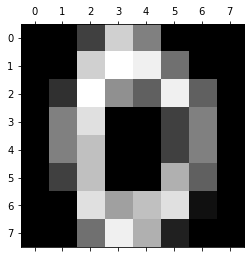

ground truth=  0


IndexError: too many indices for array

In [4]:

class Numbers:
    def __init__(self):
        #load data from sklearn
        digits = sklearn.datasets.load_digits()
        from sklearn import svm, metrics
        from sklearn.model_selection import train_test_split
        import matplotlib.pyplot as plt
        
        #BEGIN Workspace 2.1
        #TODO: Divide our dataset into Train and Test datasets (80/20 split), replacing the variables above
        #END Workspace 2.1
        
        #reference: https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html
        # The data that we are interested in is made of 8x8 images of digits, let's
        # have a look at the first 4 images, stored in the `images` attribute of the
        # dataset.  If we were working from image files, we could load them using
        # matplotlib.pyplot.imread.  Note that each image must have the same size. For these
        # images, we know which digit they represent: it is given in the 'target' of
        # the dataset.
        
            
        # To apply a classifier on this data, we need to flatten the image, to
        # turn the data in a (samples, feature) matrix:
        n_samples = len(digits.images)
        data = digits.images.reshape((n_samples, -1))
        #reshape images into a 1x64 array
        
        #data64 = digits.images.reshape(64)
        
        
        self.train_x,self.test_x,self.train_y,self.test_y= train_test_split(
            data, digits.target, test_size=0.2, shuffle=True)
        
      
       
        
        print("dataset shape= ",data.shape)
        
        self.report(digits)
        self.viewDigit(digits.images[266],digits.target[266])
        self.classify()
        #print(self.train_x[0])
        
    def report(self,digits):
        """
        Report information about the dataset using the print() function
        """
        
        print("train_x shape= ",self.train_x.shape)
        print("train_y shape= ",self.train_y.shape)
        print("test_x shape= ",self.test_x.shape)
        print("test_y shape= ",self.test_y.shape)
        
        print("Image size =",digits.images[0].shape)
        print(digits.images[0])
        
        #print("Reshaped")
        #print(np.reshape(digits.images[0],(64)))
        #print(self.train_y[0])
        # 
        #self.train_y 
        
        #self.test_x
        #self.test_y
        #BEGIN Workspace 2.2
        #TODO: Create printouts for reporting the size of each set and the size of each datapoint
        #END Workspace 2.2
        

    def classify(self):
        """
        Create a classifier using the training data and generate a 
        confusion matrix for the test data
        """
        self.knnconfusion2 = KNNClassifier(self.train_x, self.train_y, 5)
        DC= self.knnconfusion2.confusionMatrix(self.test_x, self.test_y)
        self.knnconfusion2.accuracy(DC)
        
        #BEGIN Workspace 2.3
        #TODO: Create classifier from training data, generate confusion
        #matrix for test data
        #END Workspace 2.3
        
    def viewDigit(self, digitImage, target):
        """
        Display an image of a digit
        PARAMETERS
        digitImage - a data object from the dataset
        """
        plt.gray()
        plt.matshow(digitImage)
        plt.show()
        print("ground truth= ",target)
        
tests2 = Numbers()

#myTests = unittest.TestLoader().loadTestsFromModule(tests)
#unittest.TextTestRunner().run(myTests)        
        

*Wow, I can't believe we just created a KNN Classifier - but can't we make it better?*

Yes, we saw above that our classifier didn't work perfectly. Let's explore that issue a little further

### Problem 3: Improving KNN on Digits - 30 Points

3.1 Determine which classes are most often confused (from our confusion matrix above), inspect some examples of these digits (using the viewDigit function in our Numbers class), and write a brief (4 - 5 sentences) description of why you think these particular numbers may be misclassified.

3.2 Explore the influence of the number of nearest neighbors (i.e. try changing our K). Plot the relationship between K and accuracy, and write a brief (4 - 5 sentences) description of how this factor impacts our accuracy.

3.3 (Bonus) Explore the influence of the train / test split of our data (i.e. copy our Numbers class into Numbers2 below and try changing the split for our dataset). Plot the relationship between the split % and accuracy, and write a brief (4 - 5 sentences) description of its impact.

In [ ]:
#BEGIN 3.1a
#TODO: Print out problem class images
#END 3.1a

#### 3.1b
TODO: Write description of misclassification

In [ ]:
class Numbers2:
    def __init__(self, trainPercentage):
        #load data from sklearn
        digits = sklearn.datasets.load_digits()
        
        #BEGIN Workspace 3.3a
        self.train_x = np.array() # A 2D np.array of training examples, REPLACE
        self.train_y = np.array() # A 1D np.array of training answers, REPLACE
        self.test_x = np.array() # A 2D np.array of testing examples, REPLACE
        self.test_y = np.array() # A 1D np.array of testing answers, REPLACE
        #TODO: Divide our dataset into Train and Test datasets (using trainPercentage), replacing the variables above
        #HINT: You should be able to mostly copy your own work from the original Numbers class
        #END Workspace 3.3a

    def classify(self, k):
        """
        Create a classifier using the training data and generate a confusion matrix for the test data
        """
        #BEGIN Workspace 3.2a
        #TODO: Create classifier from training data (using k nearest neighbors), generate confusion matrix for test data
        #HINT: You can copy your own work from the original Numbers class
        #END Workspace 3.2a
        
    def viewDigit(digitImage):
        """
        Display an image of a digit
        PARAMETERS
        digitImage - a data object from the dataset
        """
        plt.gray()
        plt.matshow(digitImage)
        plt.show()

#### 3.2b
TODO: Write description of influence of neighbor count

#### 3.3b
TODO: Write description of influence of training / testing split